# PCRD and Gamma Scout data analyse

In [5]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sy

from scipy.optimize import curve_fit

import pandas as pd  # data parsing library
from matplotlib import cm, colors

#from mpl_toolkits.basemap import Basemap

#import cartopy.crs as ccrs  # maps plotting library
#from cartopy.io.img_tiles import GoogleTiles
#from cartopy.io.img_tiles import OSM
#from cartopy.io.srtm import srtm_composite

import datetime


#from osgeo import gdal
#from osgeo import gdal_array

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Parsing CSV files Mrekomer + NM


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


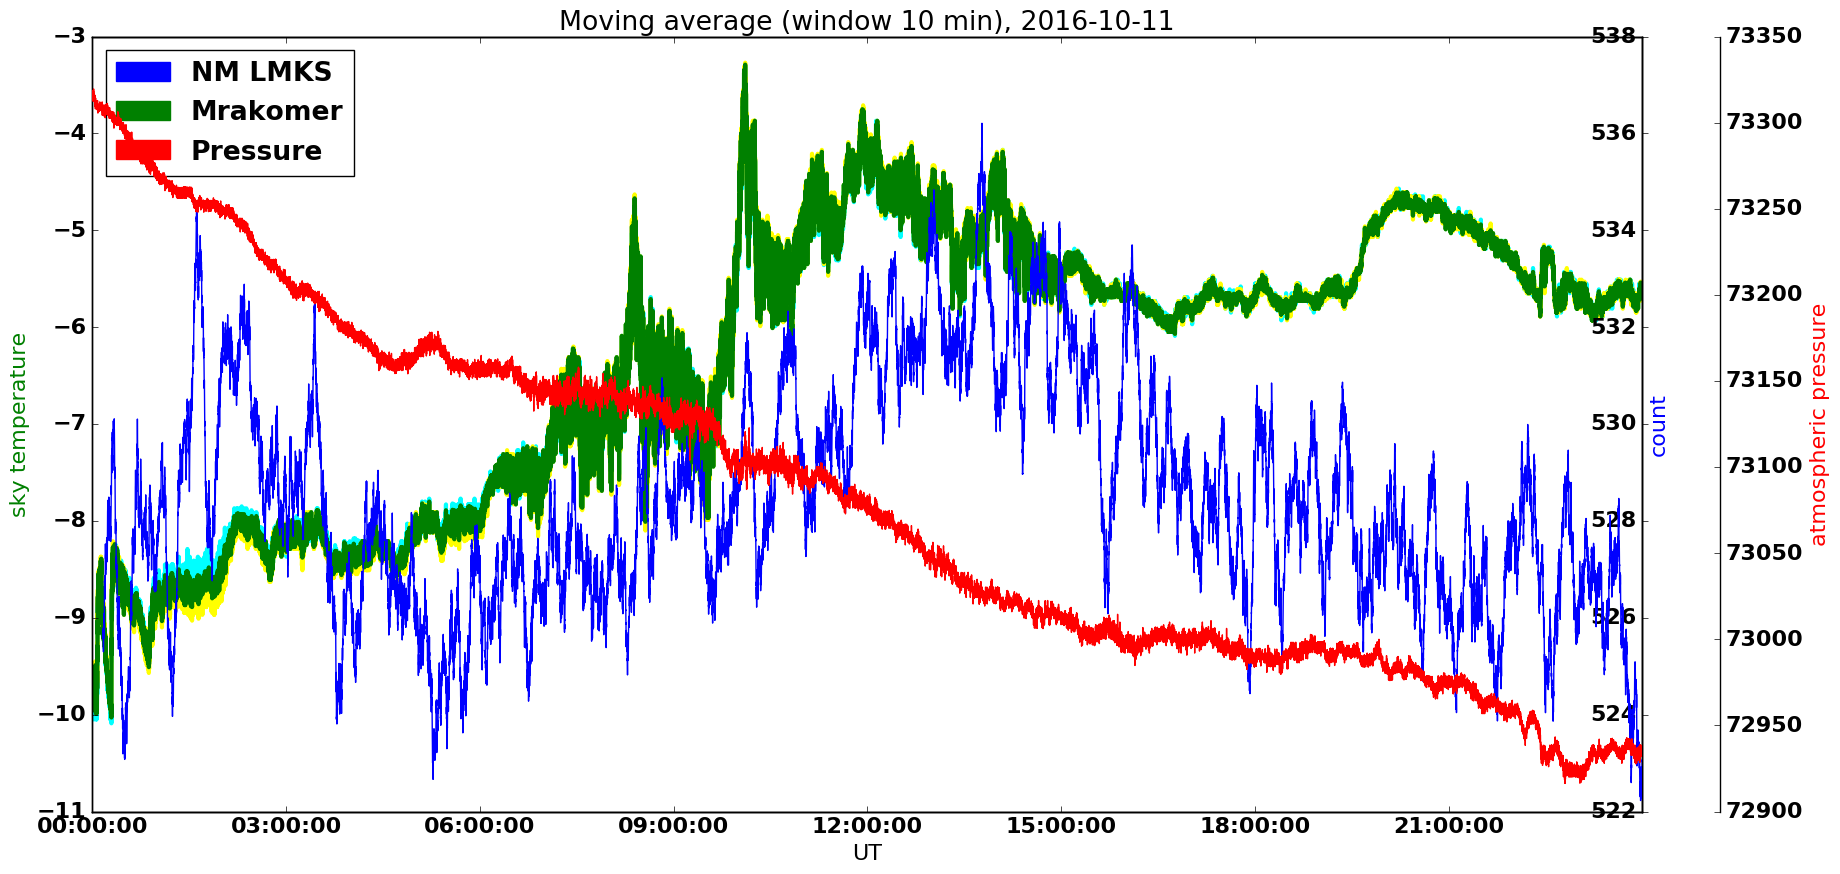

In [25]:
period = '2S'
window = 300

dfMM = pd.read_csv('mm.csv',sep=',', header=None)
dfMM[0] = pd.to_datetime(dfMM[0],unit='s')
dfMM.set_index(0,inplace = True)
dfMM = dfMM.resample(period, how=mean) # presampluje na jednotny cas
#dfMM = pd.rolling_mean(dfMM,window)
#dfMM = pd.rolling_mean(dfMM,20)


dfNM = pd.read_csv('nm.csv', header=None, delim_whitespace=True, skiprows=1)
date = str(dfNM.at[0,0])
dfNM[0] = pd.to_datetime(dfNM[0] + ' ' + dfNM[1]) # convert time to pandas datetime
#dfNM[1] = np.nan # drop time column
#dfNM = dfNM.dropna(axis=1, how='all') 
dfNM[2] = dfNM[2].convert_objects(convert_numeric=True) # convert objects to numbers
dfNM.set_index(0,inplace = True)
dfNM = dfNM.resample(period, how=mean) # presampluje na jednotny cas
dfNM = pd.rolling_mean(dfNM,window)

fig = plt.figure(figsize=(20, 10))
ax = plt.axes()        
#ax.xaxis.grid(True) # vertical lines
#ax.yaxis.grid(False) # horizontal lines
#plt.grid(True)

font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

plt.title('Moving average (window '+str(window*2/60)+' min), '+date)
plt.xlabel('UT')

#plt.ylim(0,12500)
plt.ylabel('sky temperature', color='green')
plt.plot(dfMM[5], color='cyan', linewidth=3,zorder=0)
plt.plot(dfMM[6], color='yellow', linewidth=3)
plt.plot((dfMM[5]+dfMM[6])/2, color='green', linewidth=3)
#plt.plot(dfMM[5], color='red', linewidth=3)
#plt.ylim(0,100)
par1 = plt.twinx()
par1.spines['left'].set_position(('axes', 1))
plt.ylabel('count', color='blue')
plt.plot(dfNM[2], color='blue', linestyle = '-',zorder=100)
ax.yaxis.grid(False) # abadon horizontal lines

par2 = plt.twinx()
par2.spines['right'].set_position(('axes', 1.05))
#plt.ylim(74000,75000)
plt.ylabel('atmospheric pressure', color='red')
plt.plot(dfMM[3], color='red', linestyle = '-',zorder=100)


patch1 = matplotlib.patches.Patch(color='blue', label='NM LMKS')
patch2 = matplotlib.patches.Patch(color='green', label='Mrakomer')
patch3 = matplotlib.patches.Patch(color='red', label='Pressure')
plt.legend(handles=[patch1,patch2,patch3], loc=2)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:26: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


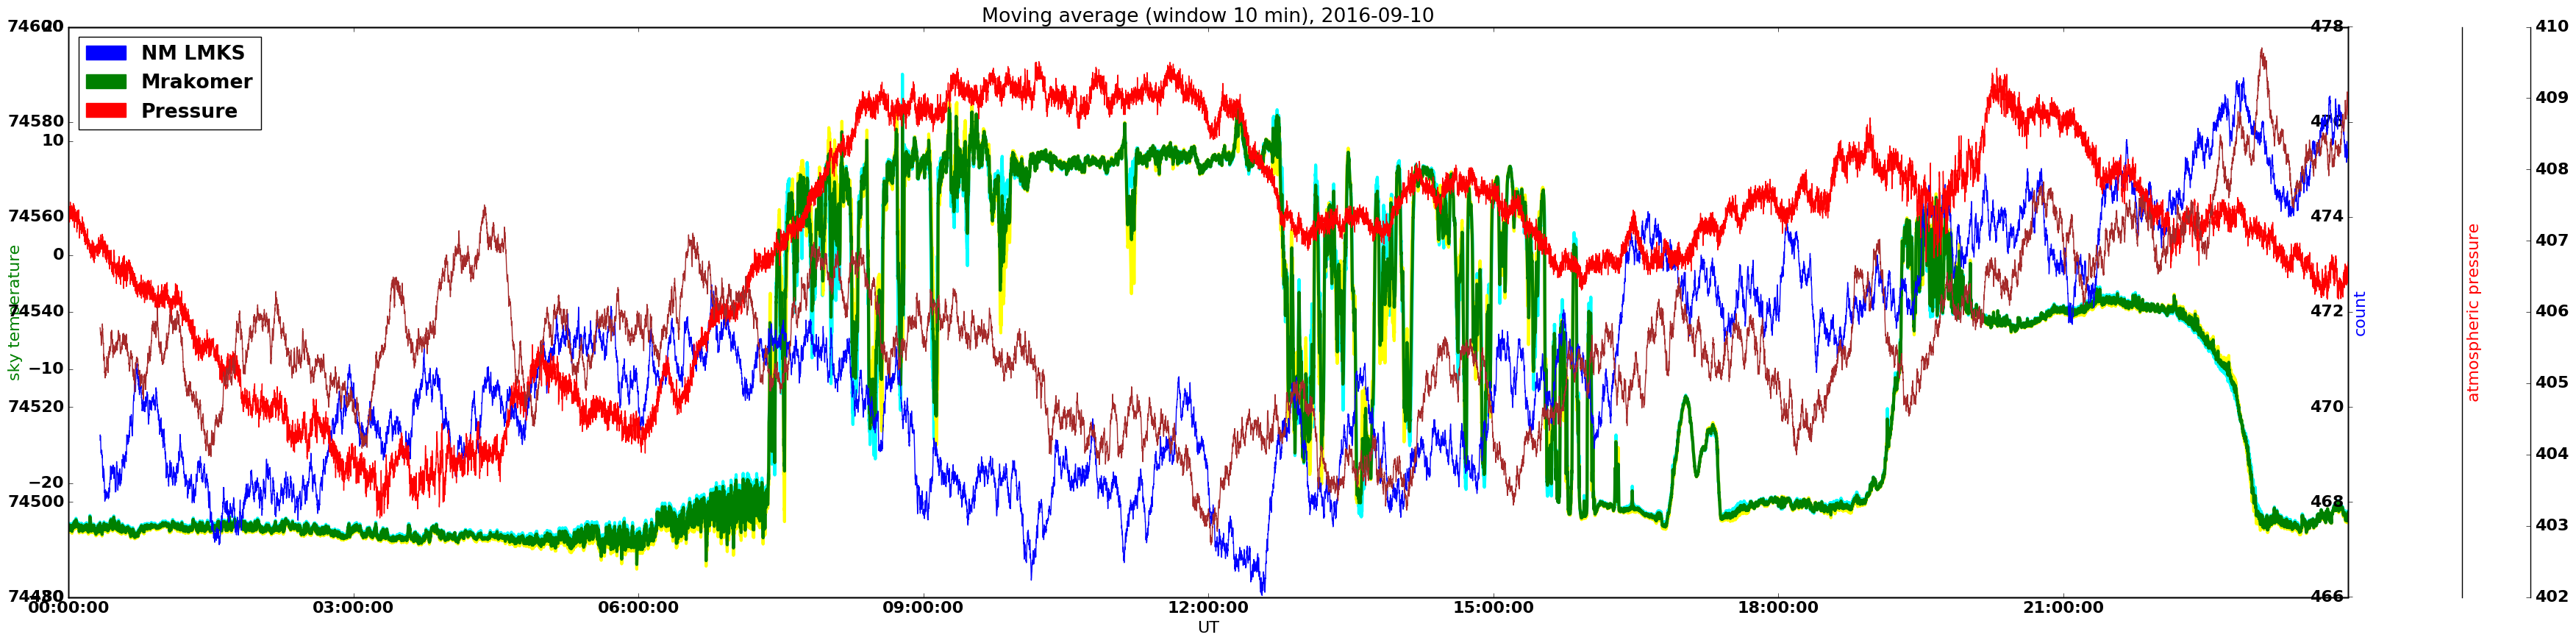

In [43]:
period = '4S'
window = 300

dfMM = pd.read_csv('mm.csv',sep=',', header=None)
dfMM[0] = pd.to_datetime(dfMM[0],unit='s')
dfMM.set_index(0,inplace = True)
dfMM = dfMM.resample(period, how=mean) # presampluje na jednotny cas
#dfMM = pd.rolling_mean(dfMM,window)
#dfMM = pd.rolling_mean(dfMM,20)

dfNM = pd.read_csv('nm.csv', header=None, delim_whitespace=True, skiprows=1)
date = str(dfNM.at[0,0])
dfNM[0] = pd.to_datetime(dfNM[0] + ' ' + dfNM[1]) # convert time to pandas datetime
#dfNM[1] = np.nan # drop time column
#dfNM = dfNM.dropna(axis=1, how='all') 
dfNM[2] = dfNM[2].convert_objects(convert_numeric=True) # convert objects to numbers
dfNM.set_index(0,inplace = True)
dfNM = dfNM.resample(period, how=mean) # presampluje na jednotny cas
dfNM = pd.rolling_mean(dfNM,window)

dfSEVAN = pd.read_csv('sevan.csv', header=None, delim_whitespace=True, skiprows=1)
date = str(dfSEVAN.at[0,0])
dfSEVAN[0] = pd.to_datetime(dfSEVAN[0] + ' ' + dfSEVAN[1]) # convert time to pandas datetime
#dfNM[1] = np.nan # drop time column
#dfNM = dfNM.dropna(axis=1, how='all') 
dfSEVAN[2] = dfSEVAN[2].convert_objects(convert_numeric=True) # convert objects to numbers
dfSEVAN.set_index(0,inplace = True)
dfSEVAN = dfSEVAN.resample(period, how=mean) # presampluje na jednotny cas
dfSEVAN = pd.rolling_mean(dfSEVAN,window)

fig = plt.figure(figsize=(40, 10))
ax = plt.axes()        
#ax.xaxis.grid(True) # vertical lines
#ax.yaxis.grid(False) # horizontal lines
#plt.grid(True)

font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

plt.title('Moving average (window '+str(window*2/60)+' min), '+date)
plt.xlabel('UT')

#plt.ylim(0,12500)
plt.ylabel('sky temperature', color='green')
plt.plot(dfMM[5], color='cyan', linewidth=3,zorder=0)
plt.plot(dfMM[6], color='yellow', linewidth=3)
plt.plot((dfMM[5]+dfMM[6])/2, color='green', linewidth=3)
#plt.plot(dfMM[5], color='red', linewidth=3)
#plt.ylim(0,100)

par1 = plt.twinx()
par1.spines['left'].set_position(('axes', 1))
plt.ylabel('count', color='blue')
plt.plot(dfNM[2], color='blue', linestyle = '-',zorder=100)
ax.yaxis.grid(False) # abadon horizontal lines

par2 = plt.twinx()
par2.spines['right'].set_position(('axes', 1.05))
#plt.ylim(74000,75000)
plt.ylabel('atmospheric pressure', color='red')
plt.plot(dfMM[3], color='red', linestyle = '-',zorder=100)

par3 = plt.twinx()
par3.spines['right'].set_position(('axes', 1.08))
plt.plot(dfSEVAN[2], color='brown', linestyle = '-')


patch1 = matplotlib.patches.Patch(color='blue', label='NM LMKS')
patch2 = matplotlib.patches.Patch(color='green', label='Mrakomer')
patch3 = matplotlib.patches.Patch(color='red', label='Pressure')
plt.legend(handles=[patch1,patch2,patch3], loc=2)


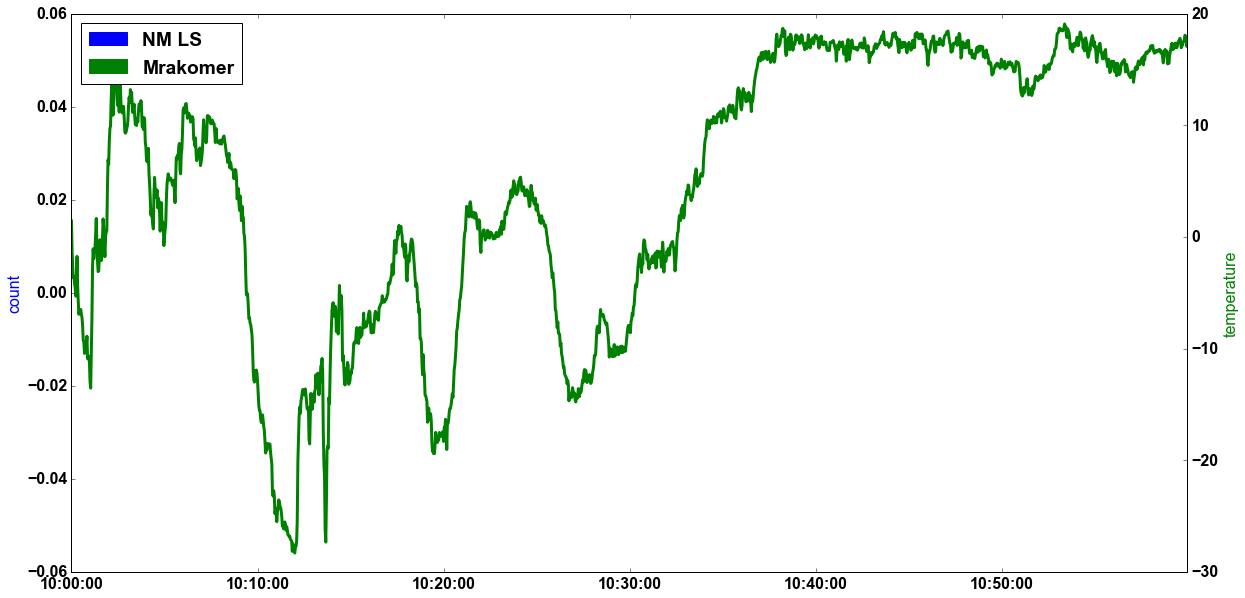

In [3]:
fig = plt.figure(figsize=(20, 10))

font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

#plt.ylim(0,100)
plt.ylabel('count', color='blue')
plt.plot(dfNM[12], color='blue', linestyle = '-')
plt.twinx()
#plt.ylim(0,12500)
plt.ylabel('temperature', color='green')
plt.plot(dfMM[6]+dfMM[5], color='green', linewidth=3)
#plt.plot(dfMM[5], color='red', linewidth=3)

patch1 = matplotlib.patches.Patch(color='blue', label='NM LS')
patch2 = matplotlib.patches.Patch(color='green', label='Mrakomer')
plt.legend(handles=[patch1,patch2], loc=2)


In [41]:
dfSEVAN

,2
0,
2016-09-10 00:00:00,NaN
2016-09-10 00:00:10,NaN
2016-09-10 00:00:20,NaN
2016-09-10 00:00:30,NaN
2016-09-10 00:00:40,NaN
2016-09-10 00:00:50,NaN
2016-09-10 00:01:00,NaN
2016-09-10 00:01:10,NaN
2016-09-10 00:01:20,NaN


/home/kakl/.local/lib/python2.7/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


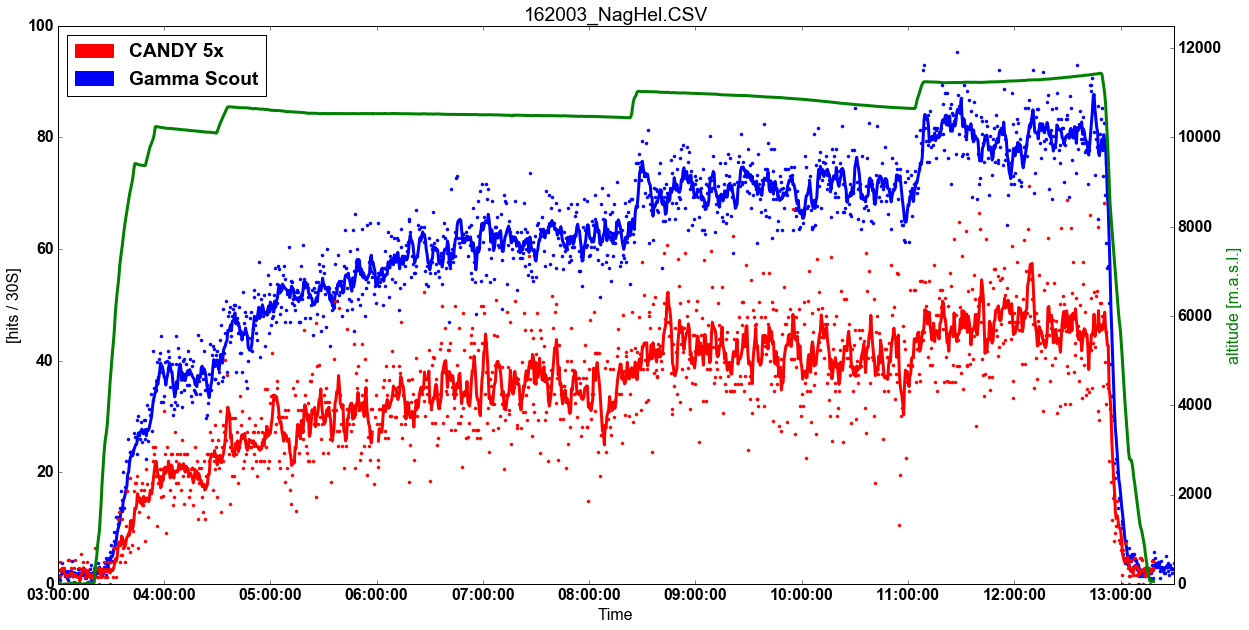

In [6]:
dfMM = pd.read_csv('mm.csv',sep=',', header=None )
dfMM['to'] = pd.to_datetime(dfG['0'])

dfP = pd.read_csv(PCRD_filepath,sep=',', header=None, dtype={0:str, 8:str} ) # datum a cas nacte jako string
dfP[0] = dfP[8].str.cat(dfP[0]) # slozi datum a cas do jednoho stringu
dfP[0] = pd.to_datetime(dfP[0], format='%d%m%y%H%M%S.%f') # rozparseruje cas

dfG.reset_index(inplace = True)
dfG.set_index('to',inplace = True) # nastavi cas jako index
dfG = dfG.resample(resampling, how=method, loffset=time_offset) # presampluje a posune cas

col_list = []
col_list.extend(range(19, 530)) # vyrobi seznam s cisly sloupcu s kanalama
dfP[18] = (dfP[col_list].sum(axis=1) / dfP[530]) * 40000 # secte kanaly a znormuje cetnosti na definovany pocet mereni
dfP.reset_index(inplace = True)
dfP.set_index(0,inplace = True) # nastavi cas jako index
dfP = dfP.resample(resampling, how=method) # presampluje

#fig = plt.figure(figsize=(50, 10))
fig = plt.figure(figsize=(20, 10))

font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

ax = plt.subplot(111)
plt.title(PCRD_filepath)
plt.xlabel('Time')

dfGG = dfG[from_time:to_time]
dfPP = dfP[from_time:to_time]
dfPP[18] = dfPP[18].multiply(5)

dfGGG = pd.rolling_mean(dfGG,6)
dfPPP = pd.rolling_mean(dfPP,6)

plt.ylim(0,100)
plt.ylabel('[hits / '+resampling+']')
plt.plot(dfGG.index.to_pydatetime(),dfGG.Counts, color='blue', marker='.', linestyle = '')
plt.plot(dfGGG.index.to_pydatetime(),dfGGG.Counts, color='blue', marker='', linestyle = '-', linewidth=3)
plt.plot(dfPP.index.to_pydatetime(), dfPP[18], color='red', marker='.', linestyle = '')
plt.plot(dfPPP.index.to_pydatetime(), dfPPP[18], color='red', marker='', linestyle = '-', linewidth=3)
plt.twinx()
plt.ylim(0,12500)
plt.ylabel('altitude [m.a.s.l.]', color='green')
plt.plot(dfPP.index.to_pydatetime(), dfPP[13], color='green', linewidth=3)

patch1 = matplotlib.patches.Patch(color='red', label='CANDY 5x')
patch2 = matplotlib.patches.Patch(color='blue', label='Gamma Scout')
plt.legend(handles=[patch1,patch2], loc=2)


/home/kakl/.local/lib/python2.7/site-packages/ipykernel/__main__.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


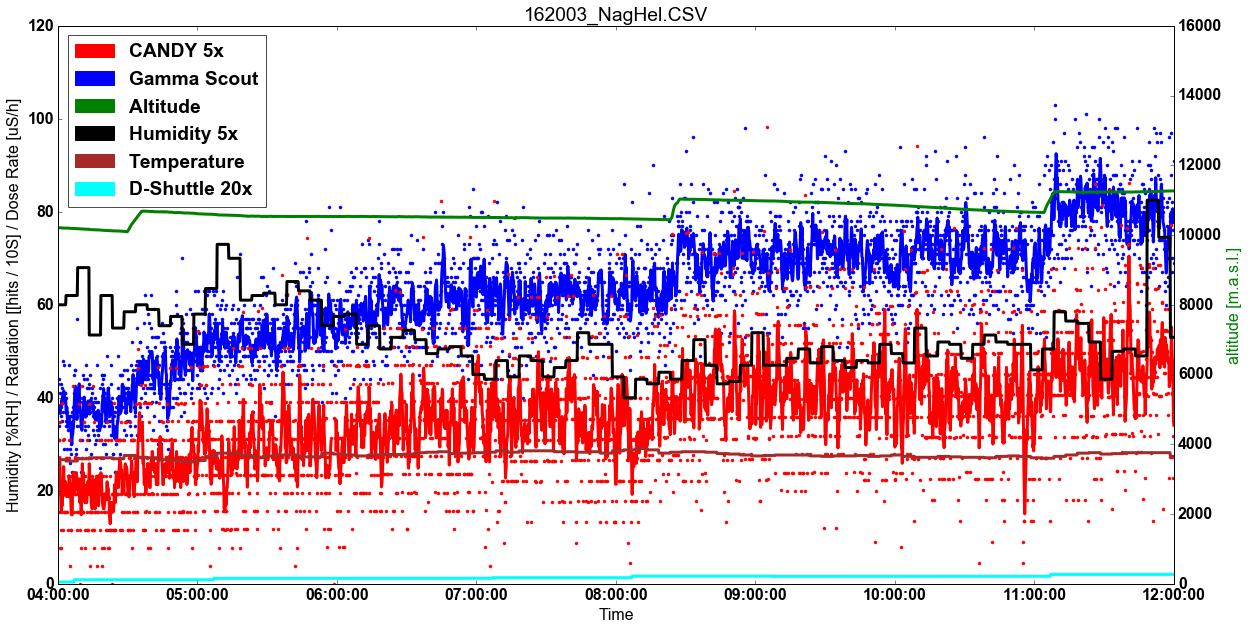

In [26]:
dfH = pd.read_csv(hum_filepath,sep=',', header=0, dtype={0:str} ) # datum a cas nacte jako string
dfH['JST'] = pd.to_datetime(dfH['JST'], format='%Y/%m/%d %H:%M:%S') # rozparseruje cas
dfH.set_index('JST',inplace = True) # nastavi cas jako index
dfH = dfH.resample(resampling, how=method, loffset=JST_time_offset, fill_method='pad') # presampluje a posune cas

dfD = pd.read_csv(d_filepath,sep=',', header=0, dtype={0:str} ) # datum a cas nacte jako string
dfD['JST'] = pd.to_datetime(dfD['JST'], format='%d/%m/%Y %H:%M') # rozparseruje cas
dfD.set_index('JST',inplace = True) # nastavi cas jako index
dfD = dfD.resample(resampling, how=method, loffset=JST_time_offset, fill_method='pad') # presampluje a posune cas

dfG = pd.read_csv(scout_filepath,sep=';', header=0 )
dfG = dfG.drop(dfG[dfG.Range > 10].index) # zahodi zaznamy s periodou delsi nez 10 s
dfG['to'] = pd.to_datetime(dfG['to'])

dfP = pd.read_csv(PCRD_filepath,sep=',', header=None, dtype={0:str, 8:str} ) # datum a cas nacte jako string
dfP[0] = dfP[8].str.cat(dfP[0]) # slozi datum a cas do jednoho stringu
dfP[0] = pd.to_datetime(dfP[0], format='%d%m%y%H%M%S.%f') # rozparseruje cas

dfG.reset_index(inplace = True)
dfG.set_index('to',inplace = True) # nastavi cas jako index
dfG = dfG.resample(resampling, how=method, loffset=time_offset) # presampluje a posune cas

col_list = []
col_list.extend(range(19, 530)) # vyrobi seznam s cisly sloupcu s kanalama
dfP[18] = (dfP[col_list].sum(axis=1) / dfP[530]) * 40000 # secte kanaly a znormuje cetnosti na definovany pocet mereni
dfP.reset_index(inplace = True)
dfP.set_index(0,inplace = True) # nastavi cas jako index
dfP = dfP.resample(resampling, how=method) # presampluje

#fig = plt.figure(figsize=(50, 10))
fig = plt.figure(figsize=(20, 10))

font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

ax = plt.subplot(111)
plt.title(PCRD_filepath)
plt.xlabel('Time')

dfGG = dfG[from_time:to_time]
dfPP = dfP[from_time:to_time]
dfH = dfH[from_time:to_time]
dfD = dfD[from_time:to_time]
#dfD['doserate'] = dfD['doserate'].multiply(20)
dfH['hum'] = dfH['hum'].multiply(5)
dfPP[18] = dfPP[18].multiply(5)

df = dfH
df['candy'] = dfPP[18]
df['scout'] = dfGG.Counts

dfGGG = pd.rolling_mean(dfGG,6)
dfPPP = pd.rolling_mean(dfPP,6)

plt.ylim(0,120)
plt.ylabel('Humidity [%RH] / Radiation [[hits / '+resampling+'] / Dose Rate [uS/h]')
plt.plot(dfGG.index.to_pydatetime(),dfGG.Counts, color='blue', marker='.', linestyle = '')
plt.plot(dfGGG.index.to_pydatetime(),dfGGG.Counts, color='blue', marker='', linestyle = '-', linewidth=3)
plt.plot(dfPP.index.to_pydatetime(), dfPP[18], color='red', marker='.', linestyle = '')
plt.plot(dfPPP.index.to_pydatetime(), dfPPP[18], color='red', marker='', linestyle = '-', linewidth=3)
plt.plot(dfH.index.to_pydatetime(), dfH['hum'], color='black', marker='', linestyle = '-', linewidth=3)
plt.plot(dfD.index.to_pydatetime(), dfD['doserate'], color='cyan', marker='', linestyle = '-', linewidth=3)
plt.plot(dfH.index.to_pydatetime(), dfH['temp'], color='brown', marker='', linestyle = '-', linewidth=3)
plt.twinx()
plt.ylim(0,16000)
plt.ylabel('altitude [m.a.s.l.]', color='green')
plt.plot(dfPP.index.to_pydatetime(), dfPP[13], color='green', linewidth=3)

patch1 = matplotlib.patches.Patch(color='red', label='CANDY 5x')
patch2 = matplotlib.patches.Patch(color='blue', label='Gamma Scout')
patch3 = matplotlib.patches.Patch(color='green', label='Altitude')
patch4 = matplotlib.patches.Patch(color='black', label='Humidity 5x')
patch5 = matplotlib.patches.Patch(color='brown', label='Temperature')
patch6 = matplotlib.patches.Patch(color='cyan', label='D-Shuttle 20x')
leg = plt.legend(handles=[patch1,patch2,patch3,patch4,patch5,patch6], loc=2)
leg.get_frame().set_alpha(0.7)

df.to_csv('rad_hum.csv')

In [13]:
df

,temp,hum,candy,scout
JST,,,,
2016-03-20 04:00:00,26.7,12.0,34.833766,27
2016-03-20 04:00:10,26.7,12.0,27.164422,43
2016-03-20 04:00:20,26.7,12.0,30.939397,31
2016-03-20 04:00:30,26.7,12.0,19.396761,44
2016-03-20 04:00:40,26.7,12.0,15.512895,34
2016-03-20 04:00:50,26.7,12.0,34.839834,41
2016-03-20 04:01:00,26.7,12.0,7.743084,37
2016-03-20 04:01:10,26.7,12.0,11.629485,38
2016-03-20 04:01:20,26.7,12.0,7.756147,36


## Map

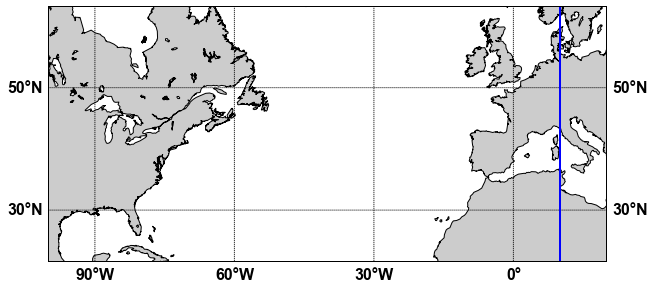

In [52]:
filepath = '162003_NagHel.CSV'
title = filepath.split('/')[-1]
df = pd.read_csv(filepath,sep=',', header=None )


for row in range(0,len(df)):
    dg, m  = divmod(df.loc[row,2], 100)   # convert ggmm.mmm to gg.ggggg
    df.loc[row,2] = dg + m / 60
    dg, m  = divmod(df.loc[row,4], 100)
    df.loc[row,4] = dg + m / 60

df = df.dropna(subset=[2])

fig=plt.figure(figsize=(10,6))
#ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=0.,llcrnrlat=89.,urcrnrlon=20.,urcrnrlat=60.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)
m.drawcoastlines()
m.fillcontinents()
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

m.plot(df[4],df[2],color='red')

m.drawgreatcircle(10,-100,10,10,linewidth=2,color='b')

#for row in range(1,len(df)):
#for row in range(200,300):
#    plt.plot([df.loc[row-1,4],df.loc[row,4]], [df.loc[row-1,2],df.loc[row,2]],
##         color=plt.cm.jet((df.loc[row,13]-0)/(15000)), marker=None, # colormap <0,1>
#          lw=3
#         )
#    m.scatter([df.loc[row-1,4],df.loc[row,4]], [df.loc[row-1,2],df.loc[row,2]],lw=3,marker=None,color=plt.cm.jet((df.loc[row,13]-0)/(15000)))
    #m.scatter([df.loc[row-1,4],df.loc[row,4]], [df.loc[row-1,2],df.loc[row,2]])


In [48]:
df[4]

57      136.813564
58      136.813561
59      136.813566
60      136.813569
61      136.813571
62      136.813568
63      136.813612
64      136.813612
65      136.813550
66      136.813587
67      136.813634
69      136.813559
70      136.813614
71      136.813627
72      136.813629
74      136.813609
75      136.813573
77      136.813572
78      136.813563
80      136.813555
81      136.813567
82      136.813566
83      136.813571
84      136.813569
85      136.813582
86      136.813598
87      136.813587
88      136.813590
89      136.813583
90      136.813580
           ...    
3776     25.157350
3777     25.143674
3778     25.130638
3779     25.116872
3780     25.104980
3781     25.093736
3782     25.084068
3783     25.073717
3784     25.062676
3785     25.053811
3786     25.042872
3787     25.032968
3788     25.022935
3789     25.013886
3790     25.002776
3791     24.993609
3792     24.983433
3793     24.973299
3794     24.963934
3795     24.957872
3796     24.954873
3797     24.

In [136]:
dfG.reset_index(inplace = True)
dfG.set_index('to',inplace = True) # nastavi cas jako index
#dfG = dfG.resample('60S', how=sum) # presampluje
dfG = dfG.resample('60S', how=sum, loffset=pd.DateOffset(years=5,days=-139,hours=12,minutes=52)) # presampluje a posune cas

col_list = []
col_list.extend(range(19, 530)) # vyrobi seznam s cisly sloupcu s kanalama
dfP[18] = (dfP[col_list].sum(axis=1) / dfP[530]) * 40000 # secte kanaly a znormuje cetnosti na definovany pocet mereni
dfP.reset_index(inplace = True)
dfP.set_index(0,inplace = True) # nastavi cas jako index
dfP = dfP.resample('60S', how=sum) # presampluje

dfP[18][0:10]
#dfG

0
2016-03-20 02:43:00     1.843446
2016-03-20 02:44:00     2.498491
2016-03-20 02:45:00     3.261845
2016-03-20 02:46:00     1.666910
2016-03-20 02:47:00     1.667362
2016-03-20 02:48:00     3.260676
2016-03-20 02:49:00     3.184391
2016-03-20 02:50:00    23.361625
2016-03-20 02:51:00     0.761281
2016-03-20 02:52:00     2.517943
Freq: 60S, Name: 18, dtype: float64

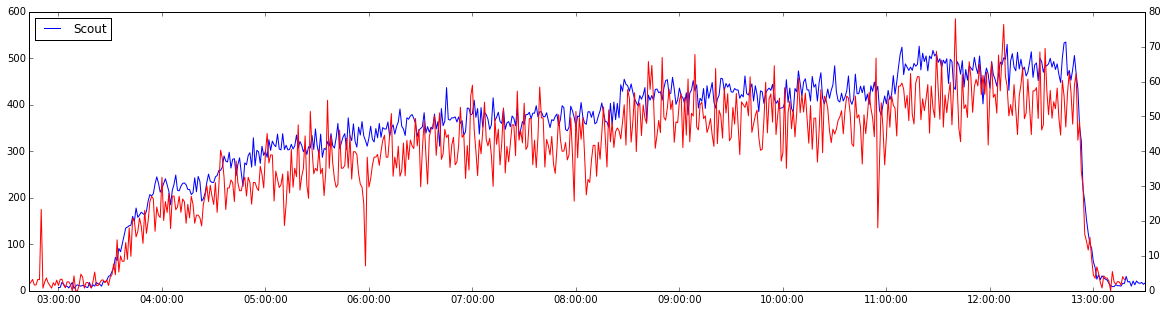

In [146]:
fig = plt.figure(figsize=(20, 5))
ax = plt.subplot(111)

dfGG = dfG['2016-03-20 03:00:00':'2016-03-20 13:30:00']

plt.ylim(0,600)
plt.plot(dfGG.index.to_pydatetime(),dfGG.Counts,label="Scout")
ax.legend(loc='upper right')
plt.twinx()
#plt.plot(dfP.index.to_pydatetime(), dfP[18], color='red', marker='.', linestyle = '-')
plt.plot(dfP.index.to_pydatetime(), dfP[18], color='red',label="PCRD")
ax.legend(loc='upper left')

plt.show()


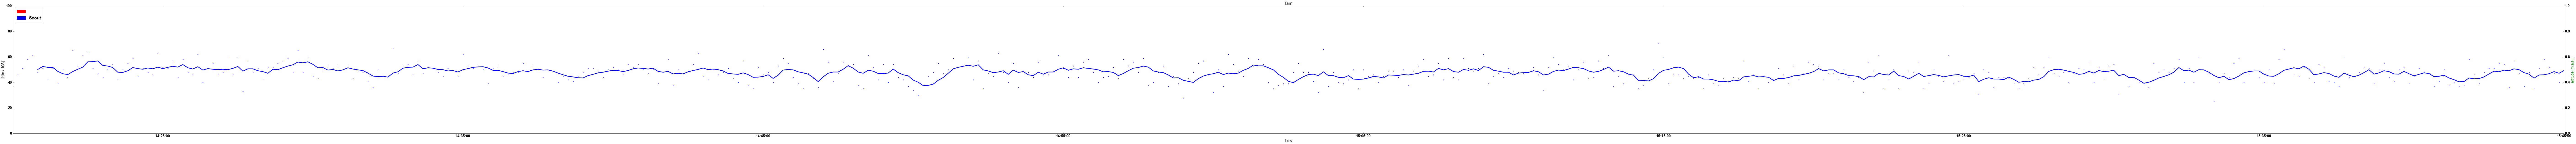

In [48]:
dfG = pd.read_csv(scout_filepath,sep=';', header=0 )
dfG = dfG.drop(dfG[dfG.Range > 10].index) # zahodi zaznamy s periodou delsi nez 10 s
dfG['to'] = pd.to_datetime(dfG['to'])

dfG.reset_index(inplace = True)
dfG.set_index('to',inplace = True) # nastavi cas jako index
dfG = dfG.resample(resampling, how=method, loffset=time_offset) # presampluje a posune cas


#fig = plt.figure(figsize=(50, 10))
fig = plt.figure(figsize=(200, 10))

font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

ax = plt.subplot(111)
plt.title('Tam')
plt.xlabel('Time')

dfGG = dfG[from_time:to_time]

dfGGG = pd.rolling_mean(dfGG,6)

plt.ylim(0,100)
plt.ylabel('[hits / '+resampling+']')
plt.plot(dfGG.index.to_pydatetime(),dfGG.Counts, color='blue', marker='.', linestyle = '')
plt.plot(dfGGG.index.to_pydatetime(),dfGGG.Counts, color='blue', marker='', linestyle = '-', linewidth=3)
plt.twinx()
#plt.ylim(0,100)
plt.ylabel('altitude [m.a.s.l.]', color='green')

patch1 = matplotlib.patches.Patch(color='red', label='')
patch2 = matplotlib.patches.Patch(color='blue', label='Scout')
plt.legend(handles=[patch1,patch2], loc=2)


       0   1    2    3    4    5    6    7       8    9    ...    521  522  \
0  24329.7   V  NaN  NaN  NaN  NaN  NaN  NaN  200316  NaN  ...      0    0   
1  24348.0   V  NaN  NaN  NaN  NaN  NaN  NaN  200316  NaN  ...      0    0   
2  24358.0   V  NaN  NaN  NaN  NaN  NaN  NaN  200316  NaN  ...      0    0   
3  24407.0   V  NaN  NaN  NaN  NaN  NaN  NaN  200316  NaN  ...      0    0   
4  24418.0   V  NaN  NaN  NaN  NaN  NaN  NaN  200316  NaN  ...      0    0   
5  24428.0   V  NaN  NaN  NaN  NaN  NaN  NaN  200316  NaN  ...      0    0   

   523  524 525  526 527  528  529    530  
0    0    0   0    0   0    0    0  39421  
1    0    0   0    0   0    0    0  51921  
2    0    0   0    0   0    0    0  48265  
3    0    0   0    0   0    0    0  47403  
4    0    0   0    0   0    0    0  52739  
5    0    0   0    0   0    0    0  48040  

[6 rows x 531 columns]
records = 3806
date = 200316 24518.0
min.altitude = -49.9   max.altitude= 11441.7
min.latitude = 24.7164833333   max.lati

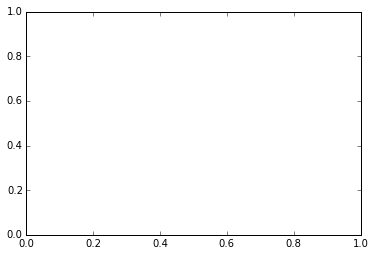

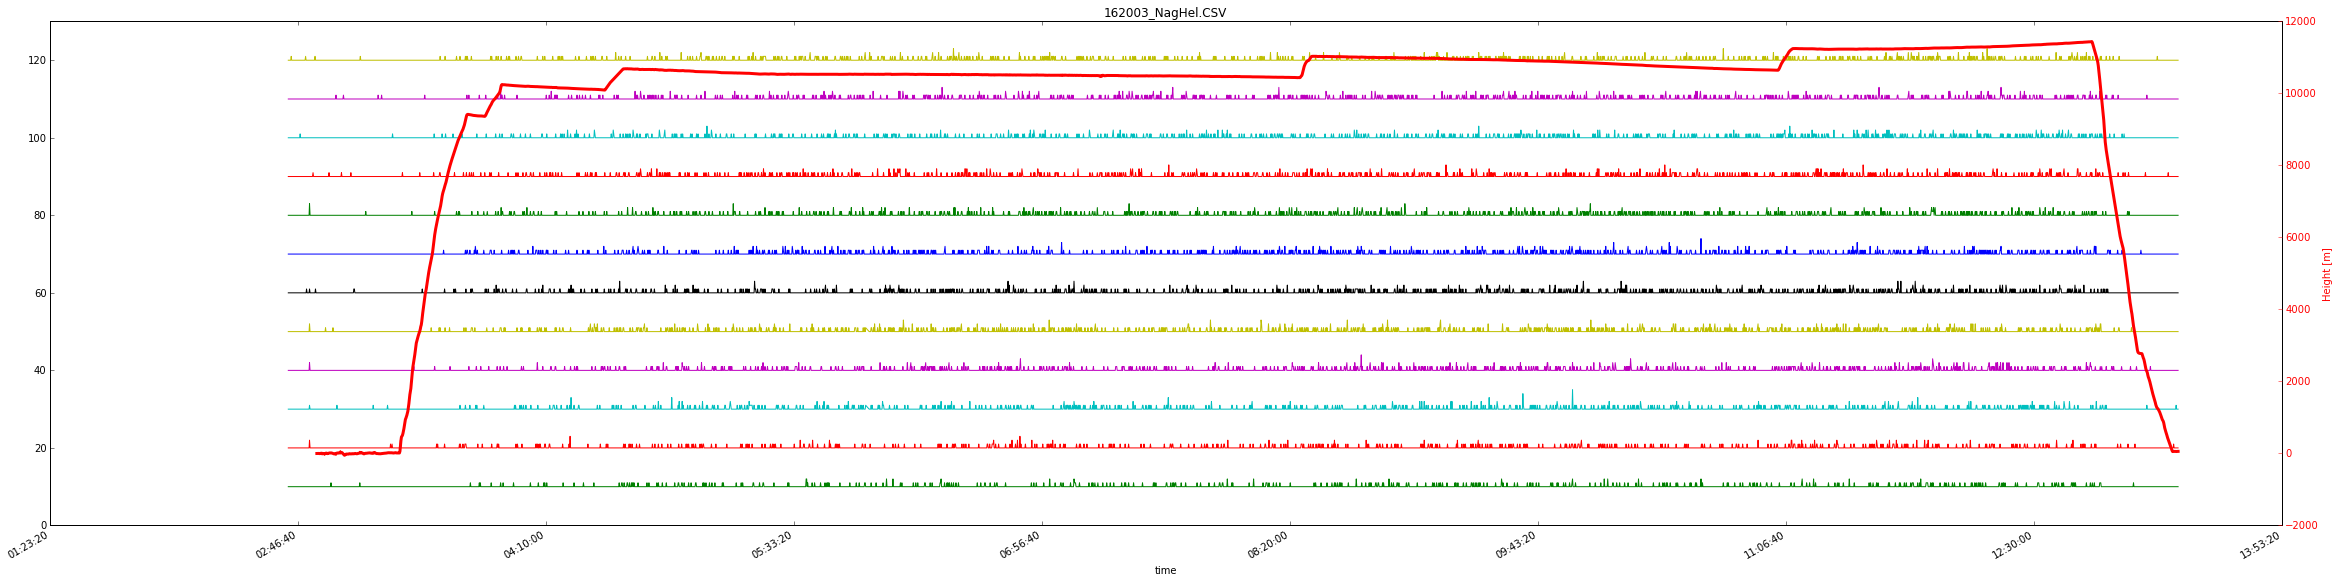

In [3]:

ax=plt.gca()# parsing input data file

plt.figure(figsize=(40, 10))


plt.ylim(0,130)

filepath = '162003_NagHel.CSV'
title = filepath.split('/')[-1]
plt.title(title)
df = pd.read_csv(filepath,sep=',', header=None )
#df = pd.read_csv('/home/kakl/Documents/comic rays radio detection/dozimetr/dukovany/15030912.CSV',sep=',', header=None )
#df = pd.read_csv('/home/kakl/Documents/comic rays radio detection/dozimetr/pribram/lety/15042609.CSV',sep=',', header=None )
#df = pd.read_csv('/home/kakl/Documents/comic rays radio detection/dozimetr/pribram/lety/1_15042609.CSV',sep=',', header=None )
#df = pd.read_csv('/home/kakl/Documents/comic rays radio detection/dozimetr/pribram/lety/2_15042609.CSV',sep=',', header=None )
#df = pd.read_csv('/home/kakl/Documents/comic rays radio detection/dozimetr/pribram/lety/3_15042610.CSV',sep=',', header=None )
#df = pd.read_csv('/home/kakl/Documents/comic rays radio detection/dozimetr/pribram/lety/NB2.CSV',sep=',', header=None )

records = len(df)
min_height = 100000
max_height = 0
min_lat = +90.
min_lon = +180.
max_lat = -90.

max_lon = -180.
date = str(df.loc[10,8]) + ' ' 
date = date + str(df.loc[10,0])

for row in range(0,records):
    dg, m  = divmod(df.loc[row,2], 100)   # convert ggmm.mmm to gg.ggggg
    df.loc[row,2] = dg + m / 60
    dg, m  = divmod(df.loc[row,4], 100)
    df.loc[row,4] = dg + m / 60
    if min_height>df.loc[row,13]:     # find maximas end minimas of important values
        min_height = df.loc[row,13]
    if max_height<df.loc[row,13]:
        max_height = df.loc[row,13]
    if min_lat>df.loc[row,2]:
        min_lat = df.loc[row,2]
    if max_lat<df.loc[row,2]:
        max_lat = df.loc[row,2]
    if min_lon>df.loc[row,4]:
        min_lon = df.loc[row,4]
    if max_lon<df.loc[row,4]:
        max_lon = df.loc[row,4]

min_lat = min_lat - 10   # add some map borders
min_lon = min_lon - 10
max_lat = max_lat + 10
max_lon = max_lon + 10
        
print df.loc[0:5,0:]
print "records =",records
print "date =",date
print "min.altitude =",min_height,"  max.altitude=",max_height 
print "min.latitude =",min_lat,"  max.latitude=",max_lat
print "min.longitude =",min_lon,"  max.longitude=",max_lon  

time = [datetime.time(0,0,0) for x in range(0, records)]
radiation2 = [0] * records
radiation3 = [0] * records
altitude = [0] * records
xx = [0] * records
line = [0] * records
avg = 1
begin = 0
end = records-avg

min_radiation = 1000
max_radiation = 0
    
n = 0
for row in range(begin, end, avg):
    h, m  = divmod(df.loc[row,0], 10000)   # hhmmss to hh
    m, s  = divmod(m, 100)   # hhmmss to hh
    time[n] = datetime.time(int(h), int(m), int(s))
    xx[n]=n
    for i in range(0, avg):
        altitude[n] = altitude[n] + df.loc[row+i,13]
        weight = 1
        for ii in range(18, 42, 2):
            radiation2[n] = radiation2[n] + (df[ii+1][row+i] - df[ii][row+i] * 120) * weight
            weight = weight + 1
    radiation2[n] = radiation2[n] / avg / 10
  
        #radiation2[n] = radiation2[n] + df.loc[row+i,18]
    #radiation2[n] = (radiation2[n] / avg)
#    radiation3[n] = radiation[n] * radiation2[n]
#    radiation[n] = 0.365 * radiation[n] + 0.52 # to pGy/s
    altitude[n] = (altitude[n] / avg) 
    
    line[n] = row    
    n = n + 1
    
values = n
      

#plt.plot(time[0:(end-begin)/avg],radiation2[0:(end-begin)/avg],  label = 'sum')
plt.plot(time[0:(end-begin)/avg],df[18][0:(end-begin)/avg],  label = '0')
plt.plot(time[0:(end-begin)/avg],df[20][0:(end-begin)/avg]+10,  label = '1')
plt.plot(time[0:(end-begin)/avg],df[22][0:(end-begin)/avg]+20,  label = '2')
plt.plot(time[0:(end-begin)/avg],df[24][0:(end-begin)/avg]+30,  label = '3')
plt.plot(time[0:(end-begin)/avg],df[26][0:(end-begin)/avg]+40,  label = '4')
plt.plot(time[0:(end-begin)/avg],df[28][0:(end-begin)/avg]+50,  label = '5')
plt.plot(time[0:(end-begin)/avg],df[30][0:(end-begin)/avg]+60,  label = '6')
plt.plot(time[0:(end-begin)/avg],df[32][0:(end-begin)/avg]+70,  label = '7')
plt.plot(time[0:(end-begin)/avg],df[34][0:(end-begin)/avg]+80,  label = '8')
plt.plot(time[0:(end-begin)/avg],df[36][0:(end-begin)/avg]+90,  label = '9')
plt.plot(time[0:(end-begin)/avg],df[38][0:(end-begin)/avg]+100,  label = '10')
plt.plot(time[0:(end-begin)/avg],df[40][0:(end-begin)/avg]+110,  label = '11')
plt.plot(time[0:(end-begin)/avg],df[42][0:(end-begin)/avg]+120,  label = '12')
#plt.plot(time[0:(end-begin)/avg],radiation3[0:(end-begin)/avg], color='yellow', label = 'radiation')
#plt.plot(time[0:(end-begin)/avg],radiation2[0:(end-begin)/avg], color='green', label = 'radiation')
plt.gcf().autofmt_xdate()
#plt.tick_params(axis='y', colors='blue')
#plt.ylabel('Dose Rate [pGy/s]',color='blue')
plt.twinx()
plt.plot(time[0:(end-begin)/avg],altitude[0:(end-begin)/avg], lw=3, color='red', label = 'height')
plt.ylabel('Height [m]',color='red')
plt.tick_params(axis='y', colors='red')

print "min.radiation =",min_radiation,"  max.radiation=",max_radiation  



In [11]:
for i in range(30, 40):
    for n in range(18,42):
        print df[n][i], 
    print radiation2[i]

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 1 125 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
0 0 0 0 0 0 0 0 0 0 1 128 0 0 0 0 0 0 0 0 0 0 0 0 4
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
2 254 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
0 0 1 127 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
0 0 0 0 1 129 0 0 0 0 1 125 0 0 0 0 0 0 0 0 0 0 0 0 5
1 126 0 0 2 253 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [ ]:
# Track with Height

plt.figure(figsize=(15, 15))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([min_lon, max_lon, min_lat, max_lat])
#gg_tiles = GoogleTiles()
gg_tiles = OSM()
ax.add_image(gg_tiles, 6)

plt.title(title)
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
      
for row in range(1,len(df)-1):
#for row in range(200,300):
    plt.plot([df.loc[row-1,4],df.loc[row,4]], [df.loc[row-1,2],df.loc[row,2]],
         color=plt.cm.jet((df.loc[row,13]-min_height)/(max_height-min_height)), marker=None, # colormap <0,1>
         transform=ccrs.PlateCarree(), lw=3
         )for row in range(1,len(df)-1):
#for row in range(200,300):
    plt.plot([df.loc[row-1,4],df.loc[row,4]], [df.loc[row-1,2],df.loc[row,2]],
         color=plt.cm.jet((df.loc[row,13]-min_height)/(max_height-min_height)), marker=None, # colormap <0,1>
         transform=ccrs.PlateCarree(), lw=3
         )

sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=min_height, vmax=max_height))
sm._A = []
cb = plt.colorbar(sm, shrink=0.3)#for row in range(5000,7500):

cb.set_label('[m] MAMSL')


min.radiation = 0   max.radiation= 27


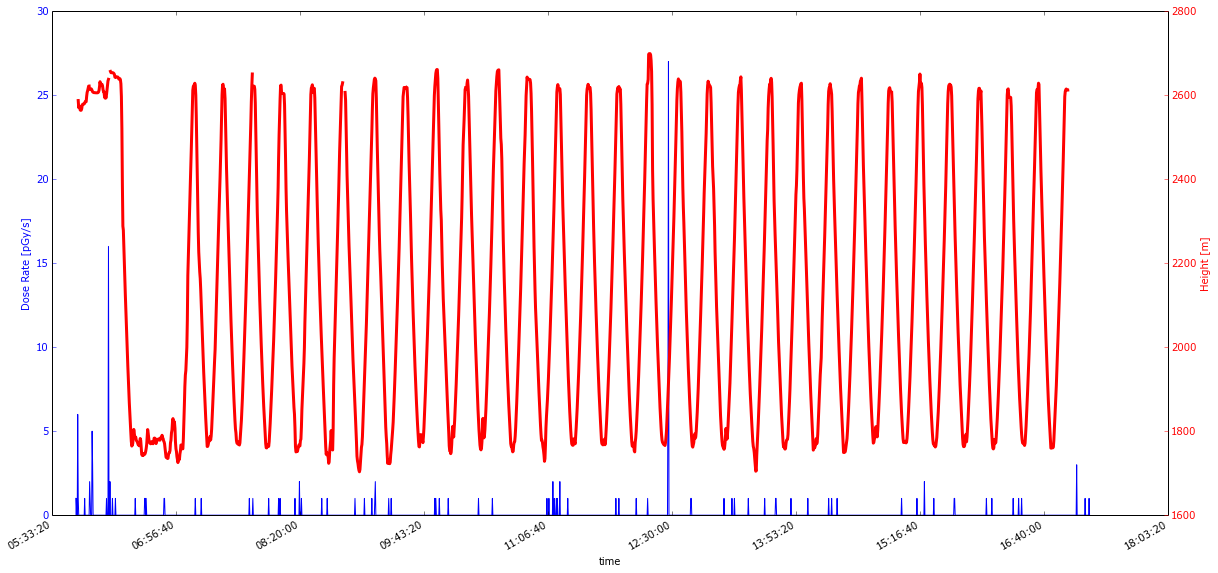

In [8]:
# Averaging

# Dose X Time

import datetime

time = [datetime.time(0,0,0) for x in range(0, records)]
radiation = [0] * records
altitude = [0] * records
xx = [0] * records
line = [0] * records
avg = 2
begin = 100
end = records-avg-100

min_radiation = 1000
max_radiation = 0
    
n = 0
for row in range(begin, end, avg):
    h, m  = divmod(df.loc[row,0], 10000)   # hhmmss to hh
    m, s  = divmod(m, 100)   # hhmmss to hh
    time[n] = datetime.time(int(h), int(m), int(s))
    xx[n]=n
    for i in range(0, avg):
        altitude[n] = altitude[n] + df.loc[row+i,13]
        radiation[n] = radiation[n] + df.loc[row+i,18]
    radiation[n] = radiation[n] / avg
    #!!! radiation[n] = 0.365 * radiation[n] + 0.52 # to pGy/s
    if min_radiation>radiation[n]:
        min_radiation=radiation[n]
    if max_radiation<radiation[n]:
        max_radiation=radiation[n]

    altitude[n] = altitude[n] / avg  
    
    line[n] = row    
    n = n + 1
    
values = n
      
plt.figure(figsize=(20, 10))
plt.plot(time[0:(end-begin)/avg],radiation[0:(end-begin)/avg], color='blue', label = 'radiation')
plt.gcf().autofmt_xdate()
plt.tick_params(axis='y', colors='blue')
plt.ylabel('Dose Rate [pGy/s]',color='blue')
plt.twinx()
plt.plot(time[0:(end-begin)/avg],altitude[0:(end-begin)/avg], lw=3, color='red', label = 'height')
plt.ylabel('Height [m]',color='red')
plt.tick_params(axis='y', colors='red')

print "min.radiation =",min_radiation,"  max.radiation=",max_radiation  


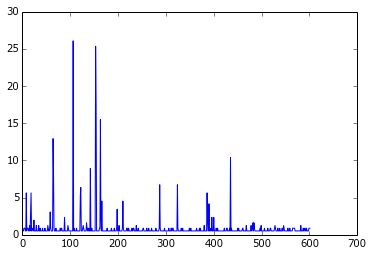

In [7]:
plt.plot(radiation[0:((end-begin)/avg)])

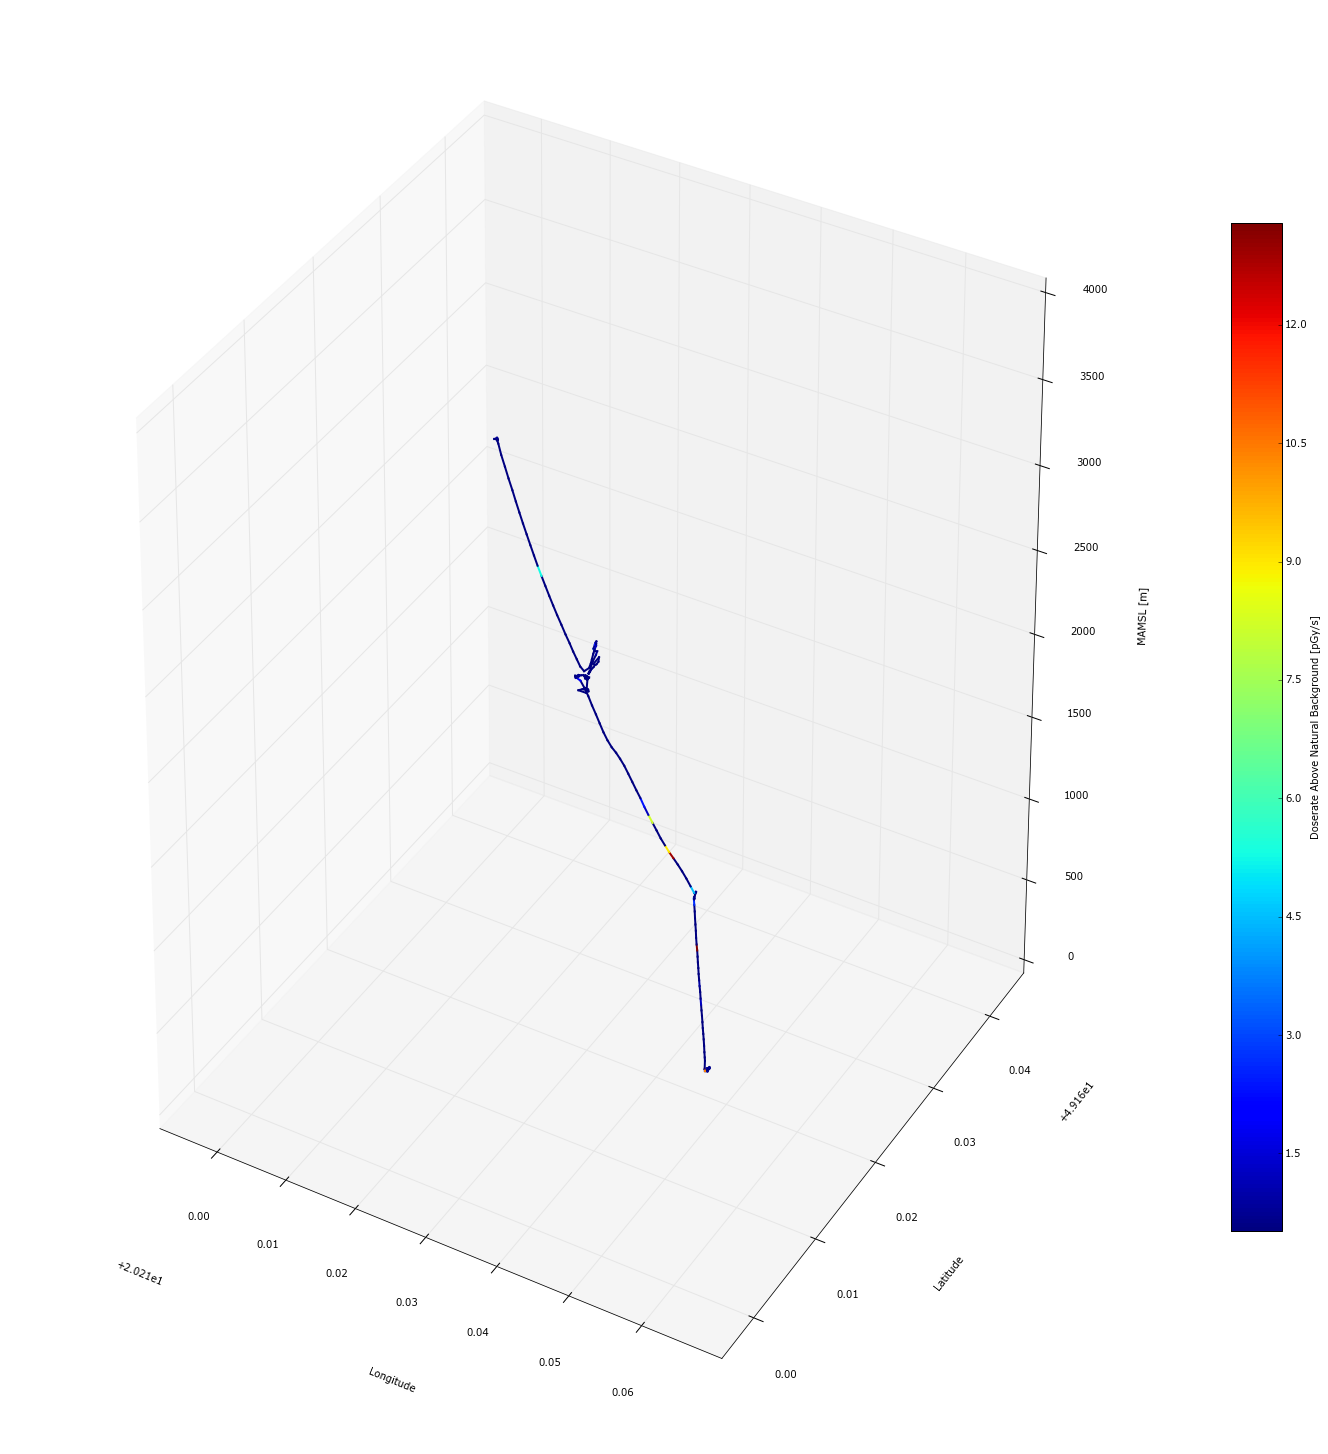

In [21]:
# 3D Dose 

import itertools

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np

import cartopy.feature
from cartopy.mpl.patch import geos_to_path
import cartopy.crs as ccrs

#gg_tiles = OSM()

fig = plt.figure(figsize=(20, 20))
ax = Axes3D(fig, xlim=[min_lon, max_lon], ylim=[min_lat, max_lat], zlim=[0,4000])
#ax.set_zlim(bottom=0)


target_projection = ccrs.PlateCarree()


feature = cartopy.feature.NaturalEarthFeature('physical', 'coastline', '110m')
geoms = feature.geometries()

geoms = [target_projection.project_geometry(geom, feature.crs)
         for geom in geoms]


paths = list(itertools.chain.from_iterable(geos_to_path(geom) for geom in geoms))

segments = []
for path in paths:
    vertices = [vertex for vertex, _ in path.iter_segments()]
    vertices = np.asarray(vertices)
    segments.append(vertices)

lc = LineCollection(segments, color='black')

ax.add_collection3d(lc)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('MAMSL [m]')

sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=min_radiation, vmax=max_radiation))
sm._A = []
cb = plt.colorbar(sm, shrink=0.7)
cb.set_label('Doserate Above Natural Background [pGy/s]')


#(0.365 * df.loc[100:8000,18] + 0.52) - (exp(df.loc[100:8000,13] * 0.0004) * 7.1)
#ax.scatter(df.loc[100:8000,4], df.loc[100:8000,2],df.loc[100:8000,13],c=plt.cm.jet((df.loc[100:8000,18]/((df.loc[100:8000,13]-500)/700)-10)/20), marker='_')
#ax.plot(xx[0:800], yy[0:800],altitude[0:800],c=plt.cm.jet((norm[0:800]-min)/(max-min)), marker='o-')
#for n in range(1,values):
for n in range(0,600):
    if altitude[n] > 0:
        ax.plot([df.loc[line[n-1],4],df.loc[line[n],4]], [df.loc[line[n-1],2],df.loc[line[n],2]],
        [altitude[n-1],altitude[n]], 
        color=plt.cm.jet((radiation[n]-min_radiation)/(max_radiation-min_radiation)), marker='None', lw=2)

#ax.plot([dukovany_lon,dukovany_lon], [dukovany_lat,dukovany_lat], [0,390], color='gray', marker='o')
#ax.plot([namest_lon,namest_lon], [namest_lat,namest_lat], [0,390], color='gray', marker='o')
#ax.text(dukovany_lon + 0.001, dukovany_lat + 0.01, 390, 'Dukovany', color='green', fontsize=12)
#ax.text(namest_lon + 0.001, namest_lat + 0.01, 390, 'Namest n. Osl.', color='green', fontsize=12)


[  -591988.97059154 -43889472.18660869    591980.96184218]
[[  8.93838366e+14   6.62742693e+16  -8.93838368e+14]
 [  6.62742693e+16   4.91395223e+18  -6.62742694e+16]
 [ -8.93838368e+14  -6.62742694e+16   8.93838370e+14]]


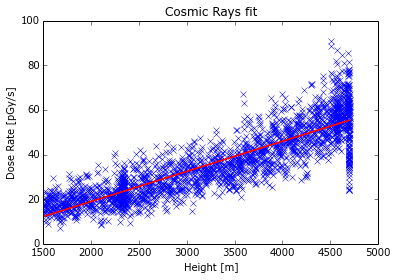

In [16]:
# Cosmic Rays fit

min_altitude = 1500

xx = [0] * values
yy = [0] * values
i = 0
for n in range(0,values):
    if altitude[n]>min_altitude:
        xx[i] = altitude[n]
        #xx[i] = altitude[n] + 2000      
        yy[i] = radiation[n]
        i = i + 1
        
nval = i - 1# Cosmic Rays fit

min_altitude = 1500

xx = [0] * values
yy = [0] * values
i = 0
for n in range(0,values):
    if altitude[n]>min_altitude:
        xx[i] = altitude[n]
        #xx[i] = altitude[n] + 2000      
        yy[i] = radiation[n]
        i = i + 1
        
nval = i - 1

def func_cr(x, a, b, c):
  return a*exp(x/b) + c

p0 = sy.array([1,4000,1])
cr_coeffs, matcov = curve_fit(func_cr, xx[0:nval], yy[0:nval], p0)

yaj = func_cr(xx[0:nval], cr_coeffs[0], cr_coeffs[1], cr_coeffs[2])
print(cr_coeffs)
print(matcov)

plt.plot(xx[0:nval],yy[0:nval],'x',xx[0:nval],yaj,'r-')
plt.title('Cosmic Rays fit')
plt.ylabel('Dose Rate [pGy/s]')
plt.xlabel('Height [m]')
plt.show()

[  62.29852545  597.59648809]
[[   46.01311744  -400.76938285]
 [ -400.76938285  3654.35654527]]


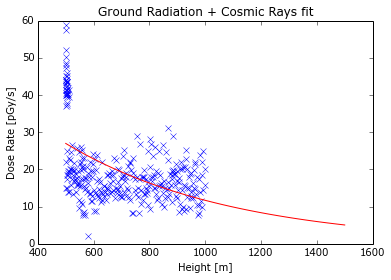

In [17]:
# Ground Radiation + Cosmic Rays fit

max_altitude = 1000
min_altitude = 500

x = [0] * values
y = [0] * values
i = 0
for n in range(0,values):
    if (altitude[n]>min_altitude) and (altitude[n]<max_altitude):
        x[i] = altitude[n]
        y[i] = radiation[n]
        i = i + 1

def func_gr(x, a, b):
  return a*exp(-1*(x/b))

p0 = sy.array([20,4000])
gr_coeffs, matcov = curve_fit(func_gr, x[0:i], y[0:i], p0)

yaj = func_gr(x[0:i], gr_coeffs[0], gr_coeffs[1])
print(gr_coeffs)
print(matcov)

plt.plot(x[0:i],y[0:i],'xb')
ground = 500
top = 1500
plt.plot(np.linspace(ground,top,100), func_gr(np.linspace(ground,top,100), gr_coeffs[0], gr_coeffs[1]),'r-')
plt.title('Ground Radiation + Cosmic Rays fit')
plt.ylabel('Dose Rate [pGy/s]')
plt.xlabel('Height [m]')
plt.show()

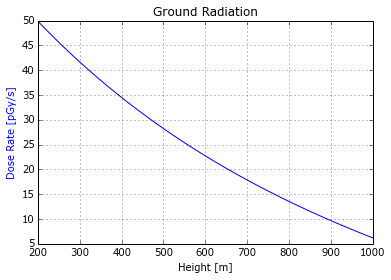

In [18]:
# Ground Radiation

plt.title('Ground Radiation')
plt.ylabel('Dose Rate [pGy/s]',color='blue')
plt.xlabel('Height [m]')

ground = 200
top = 1000
plt.plot(np.linspace(ground,top,100), 
func_gr(np.linspace(ground,top,100), gr_coeffs[0], gr_coeffs[1]) 
- func_cr(np.linspace(ground,top,100), cr_coeffs[0], cr_coeffs[1], cr_coeffs[2]))
plt.grid(True)

6652
[ -2.63948609e-24   4.62757427e-20  -3.36894080e-16   1.31598109e-12
  -2.97060552e-09   3.87284072e-06  -2.72064725e-03   8.43611914e-01
  -3.56860284e+01]


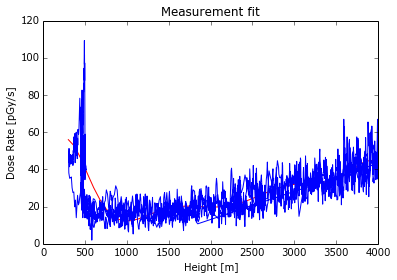

In [19]:
# Measurement  fit

min_altitude = 300
max_altitude = 4000

x = [0] * values
y = [0] * values
i = 0
for n in range(0,values):
    if (altitude[n]>min_altitude) and (altitude[n]<max_altitude):
        x[i] = altitude[n]
        y[i] = radiation[n]
        i = i + 1
        
nval = i - 1

print nval

pf_coef = np.polyfit(x[0:nval], y[0:nval],8)

print pf_coef

p = (np.poly1d(pf_coef))

#>>> p = np.poly1d([1, 2, 3])
#>>> print np.poly1d(p)
#   2
#1 x + 2 x + 3
plt.plot(sy.linspace(min_altitude,max_altitude), p(sy.linspace(min_altitude,max_altitude)), 'r-')

plt.plot(x[0:nval],y[0:nval])
plt.title('Measurement fit')
plt.ylabel('Dose Rate [pGy/s]')
plt.xlabel('Height [m]')
plt.show()

minimum [ 1002.20110055  2026.8134067 ] m n.m.


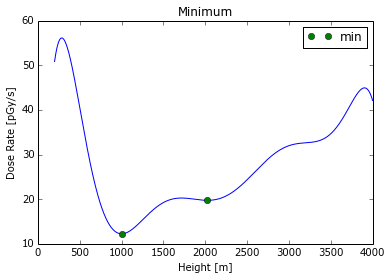

In [20]:
x = linspace(200,4000,2000)
data = p(x)

#a = diff(sign(diff(data))).nonzero()[0] + 1 # local min+max
b = (diff(sign(diff(data))) > 0).nonzero()[0] + 1 # local min
#c = (diff(sign(diff(data))) < 0).nonzero()[0] + 1 # local max

plot(x,data)
plot(x[b], data[b], "o", label="min")
#plot(x[c], data[c], "o", label="max")
legend()
print "minimum",x[b],"m n.m."
plt.title('Minimum')
plt.ylabel('Dose Rate [pGy/s]')
plt.xlabel('Height [m]')

[  147.53775402  -360.00905734    46.2618439   5804.7399182    -46.71404061]
[[  1.24432461e+01   2.97748046e+01  -5.68088616e+00  -4.10067239e+02
    6.79800391e+00]
 [  2.97748046e+01   1.42066082e+02  -1.17259546e+02  -9.08518947e+03
    1.33051224e+02]
 [ -5.68088616e+00  -1.17259546e+02   1.73720707e+02   1.37415163e+04
   -1.94047824e+02]
 [ -4.10067239e+02  -9.08518947e+03   1.37415163e+04   1.08905332e+06
   -1.53314178e+04]
 [  6.79800391e+00   1.33051224e+02  -1.94047824e+02  -1.53314178e+04
    2.16939409e+02]]


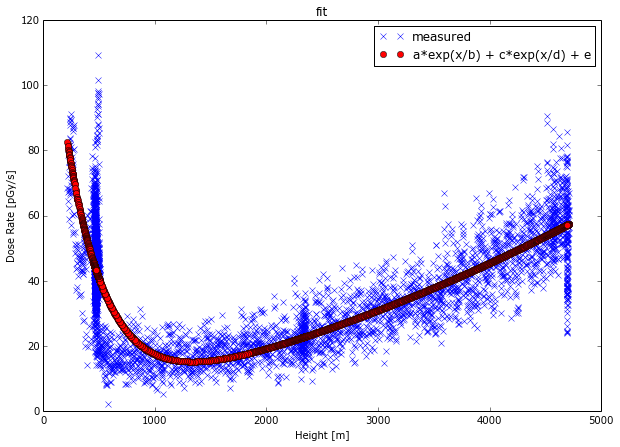

In [21]:
# fit fit

min_altitude = 200

plt.figure(figsize=(10, 7))
x = linspace(400,4000,2000)

x = [0] * values
y = [0] * values
i = 0
for n in range(0,values):
    if altitude[n]>min_altitude:
        x[i] = altitude[n]
        y[i] = radiation[n]
        i = i + 1
        
nval = i - 1

def func(x, a, b, c, d, e):
  return a*exp(x/b) + c*exp(x/d) + e

p0 = sy.array([100,-300,3,2000,1])
coeffs, matcov = curve_fit(func, x[0:nval], y[0:nval], p0)

yaj = func(x, coeffs[0], coeffs[1], coeffs[2], coeffs[3], coeffs[4])
print(coeffs)
print(matcov)

plt.plot(x[0:nval],y[0:nval],'x', label="measured")
plt.plot(x[0:nval],yaj[0:nval],'or', label="a*exp(x/b) + c*exp(x/d) + e")
#plt.plot(x,coeffs[0]*exp(x/coeffs[1]),'g-', label="a*exp(x/-b)")
#[0:nval]plt.plot(x,coeffs[2]*exp(x/coeffs[3]),'y-', label="c*exp(x/d)")
plt.title('fit')
plt.ylabel('Dose Rate [pGy/s]')
plt.xlabel('Height [m]')
legend()
plt.show()

minimum [ 1336.46823412] m n.m.


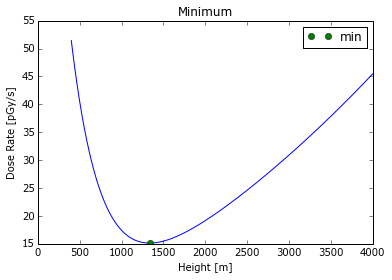

In [22]:
x = linspace(400,4000,2000)
data = func(x[0:nval], coeffs[0], coeffs[1], coeffs[2], coeffs[3], coeffs[4])

b = (diff(sign(diff(data))) > 0).nonzero()[0] + 1 # local min

plot(x[0:nval],data[0:nval][0:nval])
plot(x[b], data[b], "o", label="min")
#plot(x[c], data[c], "o", label="max")
legend()
print "minimum",x[b],"m n.m."
plt.title('Minimum')
plt.ylabel('Dose Rate [pGy/s]')
plt.xlabel('Height [m]')

In [4]:
import sys
print (sys.version)

2.7.6 (default, Mar 22 2014, 22:59:56) 
[GCC 4.8.2]


In [28]:
a=[1,2,3,4]

In [31]:
a = a[1:]+[0]
#a[-1]=0
print a

[4, 0, 0, 0]


In [41]:
t = np.linspace(1,30,30)

In [44]:
10. %10

0.0